<a href="https://colab.research.google.com/github/nefisa-codes/Data-Cleaning/blob/main/D213_task2_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: check  tensonflow version
!pip install tensorflow

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
import re
import seaborn as sns
import csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving amazon_cells_labelled.txt to amazon_cells_labelled (1).txt
Saving imdb_labelled.txt to imdb_labelled (1).txt
Saving yelp_labelled.txt to yelp_labelled (1).txt


In [ ]:
df1 = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None)

In [ ]:
df2 = pd.read_csv('imdb_labelled.txt', sep='\t', header=None)

In [ ]:
df3 = pd.read_csv('yelp_labelled.txt', sep='\t', header=None)

In [ ]:
df = pd.concat([df1, df2, df3])

In [ ]:
df.columns = ['review', 'sentiment']

In [ ]:
display(df)

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.shape

(2748, 2)

In [ ]:
df.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [ ]:
#countof postive  and negative  reviews
df.sentiment.value_counts()

,count
sentiment,
1,1386
0,1362


Text(0, 0.5, 'Count')

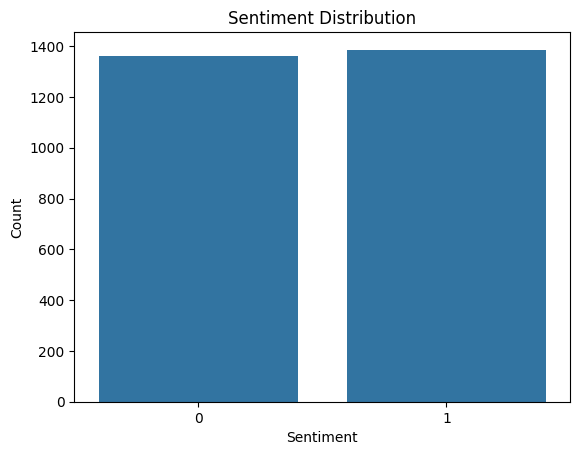

In [ ]:
import matplotlib.pyplot as plt
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

In [ ]:
#count missing values
df.isna().sum()

,0
review,0
sentiment,0


In [ ]:
#drop Na values
df.dropna(inplace=True)

In [ ]:
#count missing values
df.isnull().sum()

,0
review,0
sentiment,0


#Part II: Data Preparation
B1. Perform exploratory data analysis on the chosen data set, and include an explanation of each of the following elements:


*   presence of unusual characters (e.g., emojis, non-English characters)
*   vocabulary size
*   proposed word embedding length
*  Statistical justification for the chosen maximum sequence length



In [ ]:
#identify and display all the unique characters present in the 'review'
list_of_chars = set(''.join(df['review'].astype(str)))
print(list(list_of_chars))

['z', 'é', '(', 'y', 'I', '\t', 'p', 's', '6', '+', 'u', 'U', 'd', '1', '7', '8', '0', '?', '$', 'D', 'n', '4', ']', 'å', 'ê', '\x85', 'Q', 'w', ':', 'i', '&', 'r', '\n', 'K', '5', 'A', 'C', 'k', 'B', '-', 'R', 't', 'O', 'j', 'f', 'M', '/', 'S', 'L', 'g', 'x', 'l', 'c', '.', 'h', 'J', 'a', '\x97', ')', 'E', 'V', '9', 'G', 'P', '2', ';', 'F', 'Z', '\x96', '%', "'", 'e', '*', ' ', ',', '[', 'b', 'H', 'v', 'T', 'Y', 'N', '3', '"', 'W', 'X', 'm', 'o', '#', '!', 'q']


In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')
import re



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
 #remove empty rows
df = df[df['review'].str.strip().astype(bool)]

In [ ]:
#  As shown below there no emojis in the in data review dataset
emojis = [re.findall(r'[^\w\s,]', review) for review in df['review']]
print(emojis)


[['.'], ['.'], ['.'], ['.', '!', '!'], ['.'], ['.'], ['.'], ['.', '.', '.', '!'], ['.'], ['!', '.'], ['.'], ['.'], ['+', '.'], [], ['"', '"', '.'], ['.'], ['!'], ['!', '.'], ['!', '.'], ['.'], ["'", '.'], ['!'], ['.'], ["'", '.'], ['.'], ['/', '.'], ["'", "'", "'", '.'], ["'", '.'], ['.'], ["'", '.'], ['.'], ['.'], ['.'], ['.'], ['.'], ['.', '.'], ['.'], ['.'], ['.'], ['.'], ['.'], ['.'], ['.'], ['.'], ['.'], [], ['?', '.'], ['.'], ['.'], ['.'], ["'", '.'], ['.'], ['-', '.'], ["'", '.'], ['!'], ['.', '.'], ['.'], ['!'], ['.'], ['.'], ["'", '.'], ['.'], ['-', "'", '-', '.'], ['-', '.'], ['.'], ["'", '.'], ['.'], ['.'], ['.'], [':', '.', ')'], ["'", '.'], ['.'], ['!'], ['.'], ['.'], ['.'], ['.', '.', '.', '.'], ['.'], ['.'], ['!', '!', '!', '!', '!', '!', '!', '!', '!'], ['.'], ['.'], ['.'], ['.'], ['.'], ['.'], ['.'], ['.'], ['!'], ['!'], ['.'], ['.'], ['!', '.'], ['.'], ['.', '.', '.'], ['!'], ['.'], ['.'], ["'", '.', '.', '.', '.', "'", '(', ')', '.'], ["'", '.'], ['.'], ['.'], ['.'],

In [ ]:
# as shown below there is no non englsih words in the data
non_english = [re.findall(r'[^\x00-\x7F]+', review) for review in df['review']]
print(non_english)

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],

In [ ]:
# Initialize stopwords
stop_words = set(stopwords.words('english'))

# Preprocessing function
def preprocess_text(description):
    # Remove punctuation but keep spaces
    description = re.sub("[^a-zA-Z\s]", "", description)
    # Convert to lowercase
    description = description.lower()
    # Perform tokenization
    description = nltk.word_tokenize(description)
    # Perform lemmatization
    lemma = nltk.WordNetLemmatizer()
    description = [lemma.lemmatize(word) for word in description]
    # Remove stopwords
    description = [word for word in description if word not in stop_words]
    return ' '.join(description)


In [ ]:


# Apply preprocessing to all reviews
description_list = [preprocess_text(desc) for desc in df['review']]

# Tokenization and vectorization
vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(description_list)

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(description_list)

print("Sample tokenized sequence:", sequences[0])
print("Word index:", tokenizer.word_index)



Sample tokenized sequence: [47, 256, 107, 536, 27, 1989]
Word index: {'<OOV>': 1, 'wa': 2, 'good': 3, 'movie': 4, 'great': 5, 'film': 6, 'phone': 7, 'one': 8, 'time': 9, 'like': 10, 'food': 11, 'place': 12, 'work': 13, 'service': 14, 'really': 15, 'bad': 16, 'ha': 17, 'well': 18, 'dont': 19, 'would': 20, 'best': 21, 'even': 22, 'ever': 23, 'also': 24, 'back': 25, 'get': 26, 'go': 27, 'quality': 28, 'love': 29, 'make': 30, 'ive': 31, 'made': 32, 'character': 33, 'product': 34, 'im': 35, 'headset': 36, 'could': 37, 'nice': 38, 'thing': 39, 'better': 40, 'excellent': 41, 'sound': 42, 'never': 43, 'recommend': 44, 'much': 45, 'use': 46, 'way': 47, 'battery': 48, 'think': 49, 'first': 50, 'look': 51, 'price': 52, 'see': 53, 'didnt': 54, 'ear': 55, 'pretty': 56, 'acting': 57, 'say': 58, 'year': 59, 'got': 60, 'still': 61, 'worst': 62, 'case': 63, 'doe': 64, 'minute': 65, 'enough': 66, 'two': 67, 'little': 68, 'disappointed': 69, 'everything': 70, 'every': 71, 'scene': 72, 'right': 73, 'waste

B2.  Describe the goals of the tokenization process, including any code generated and packages that are used to normalize text during the tokenization process.

The goal of Tokenization to break raw text into smaller pieces, like words or subwords, making it easier to work with in machine learning. It standardizes the text by splitting it into tokens and handles out-of-vocabulary (OOV) words by assigning them a special token, like , so the model can deal with new or unseen words without issues. The text is then converted into sequences of integers, where each number represents a word's position in the vocabulary.

In [ ]:
# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary size:", vocab_size)

Vocabulary size: 4757


In [ ]:
#demetmin the min max and  length of reviews
review_length = []
for char_length in df['review']:
  review_length.append(len(char_length))
  #print(review_length)

max_review_length = max(review_length)
min_review_length = min(review_length)
avg_review_length = sum(review_length)/len(review_length)
print("Max review length:",max_review_length)
print("Min review length:",min_review_length)
print("Avg review length:",avg_review_length)

Max review length: 7944
Min review length: 7
Avg review length: 71.52838427947599


In [ ]:
#split the data into train and test
import numpy as np
from sklearn.model_selection import train_test_split


X = np.array(description_list)
y = df.sentiment.values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15, stratify=y)
y_train = pd.Series(y_train)
y_test = pd.Series(y_test)

print("X_train size:",X_train.shape)
print("X_tests size:",X_test.shape)
print("y_train size:",y_train.shape)
print("y_test size:",y_test.shape)

X_train size: (2198,)
X_tests size: (550,)
y_train size: (2198,)
y_test size: (550,)


In [ ]:


# Define max_length, padding_type, and trunc_type
max_length = int(np.percentile(review_length, 95))
padding_type = 'post'
trunc_type = 'post'

3B. Padding helps ensure all sequences in the dataset have the same length, making them suitable for input into neural network models like LSTMs, which require consistent input shapes. For this task, padding is used to extend shorter sequences to the desired length without changing their meaning, so the model can process the data effectively. Below is the padded result.

In [ ]:
#Apply Padding to training data
sequences_train = tokenizer.texts_to_sequences(X_train)
padded_train = pad_sequences(sequences_train, maxlen= max_length, padding =padding_type,truncating=trunc_type)
padded_train


array([[   2,  219,  282,    4,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0],
       [  43,  224,  636, 4122,   43,   23, 1127,

In [ ]:

#apply padding to test data
sequences_test = tokenizer.texts_to_sequences(X_test)
padded_test = pad_sequences(sequences_test, maxlen= max_length, padding =padding_type,truncating=trunc_type)
padded_test

array([[  88,   53,    4, ...,    0,    0,    0],
       [1486, 2988,  246, ...,    0,    0,    0],
       [1121,  601, 2806, ...,    0,    0,    0],
       ...,
       [ 273, 3812, 1496, ...,    0,    0,    0],
       [1732,   53,    3, ...,    0,    0,    0],
       [  62,  480,   23, ...,    0,    0,    0]], dtype=int32)

4B.For this model, we use sigmoid activation in the output layer because it's perfect for binary classification tasks, like distinguishing between fake and genuine reviews, by producing outputs between 0 and 1. The binary_crossentropy loss function is chosen because it works well for binary classification, measuring the difference between predicted probabilities and the actual class labels. Adam is selected as the optimizer since it's efficient and adapts the learning rate, making it suitable for text classification tasks. We set num_epochs = 25 to allow the model enough time to learn without overfitting, while monitoring performance to adjust if needed.

In [ ]:
from sys import maxsize
#Display the padded sequence
np.set_printoptions(threshold=maxsize)
# Show first 50 tokens
print(padded_train[1][:50])

[  43  224  636 4122   43   23 1127 4123    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


B5.  Explain the steps used to prepare the data for analysis, including the size of the training, validation, and test set split (based on the industry average).
To get the data ready for analysis, I first cleaned it up by removing any rows with missing values to ensure everything was complete and reliable. Then, I separated the text into X (the features) and the sentiment labels into y. After that, I split the data into 80% for training and 20% for testing, which is a common way to make sure the model gets enough data to learn while still having some set aside to check how well it performs on new, unseen data. I also made sure the split kept the balance between positive and negative sentiments, so the model gets a fair shot at learning from both. This setup ensures the process is straightforward and effective.

In [ ]:
#convert padded data to numpy array to be used in model
padded_train = np.array(padded_train)
padded_test = np.array(padded_test)
train_labels = np.array(y_train)
test_labels = np.array(y_test)

In [ ]:
#B6.a copy of the prepared data set
#export the data to CSV file
pd.DataFrame(padded_train).to_csv('padded_train.csv', index=False)
pd.DataFrame(padded_test).to_csv('padded_test.csv', index=False)
pd.DataFrame(train_labels).to_csv('train_labels.csv', index=False)
pd.DataFrame(test_labels).to_csv('test_labels.csv', index=False)


In [ ]:
from google.colab import files

files.download('padded_train.csv')
files.download('padded_test.csv')
files.download('train_labels.csv')
files.download('test_labels.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Part III: Network Architecture


C2.  Discuss the number of layers, the type of layers, and the total number of parameters.


*   The model starts with an Embedding layer to convert words into vectors, followed by a Bidirectional LSTM layer to capture context from both directions in a sequence. Dropout layers are included to prevent overfitting, and two Dense layers with ReLU activation refine the features. The final Dense layer uses a sigmoid activation to output probabilities for binary classification. Overall, the model has about 131,301 trainable parameters, carefully designed to balance performance and complexity.


C3 Justify the choice of hyperparameters, including the following elements:
• activation functions number of nodes per layer,loss function,optimizer,stopping criteria,evaluation metric  

*  The model uses ReLU activation for efficient learning and sigmoid for binary classification. The LSTM has 32 nodes, and the Dense layers (100 and 50 nodes) simplify feature extraction. Binary cross-entropy is the chosen loss function for accurate probability-based error calculation, and Adam optimizer ensures steady and efficient weight updates. Early stopping avoids overfitting by stopping training when validation loss stops improving, and accuracy is used as the evaluation metric to measure performance.





In [ ]:
#Building The Neural Network Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.regularizers import l2
vocab_size= 4757
embedding_dim = 32
max_length = 20
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
activation = 'sigmoid'
loss = 'binary_crossentropy'
optimizer = Adam(learning_rate=0.0005)
num_epochs = 25
callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)



In [ ]:

# Build the model

model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2)),
    Dropout(0.5),
    Dense(100, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])
 # Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Build the model by providing input shape
model.build(input_shape=(None,max_length))
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 20, 32)              │         152,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │           6,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 180,465 (704.94 KB)

 Trainable params: 180,465 (704.94 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping_monitor = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, mode='min', restore_best_weights=True
)

history = model.fit(padded_train, train_labels, epochs=num_epochs, validation_data=(padded_test, test_labels), callbacks=[early_stopping_monitor])

Epoch 1/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 139ms/step - accuracy: 0.5547 - loss: 0.8575 - val_accuracy: 0.7509 - val_loss: 0.7170
Epoch 2/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - accuracy: 0.8005 - loss: 0.5937 - val_accuracy: 0.7782 - val_loss: 0.4959
Epoch 3/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - accuracy: 0.9298 - loss: 0.2570 - val_accuracy: 0.7800 - val_loss: 0.5194
Epoch 4/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 12s 138ms/step - accuracy: 0.9574 - loss: 0.1658 - val_accuracy: 0.7618 - val_loss: 0.5968
Epoch 5/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - accuracy: 0.9773 - loss: 0.1081 - val_accuracy: 0.7509 - val_loss: 0.6360
Epoch 6/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - accuracy: 0.9752 - loss: 0.1062 - val_accuracy: 0.7745 - val_loss: 0.7243
Epoch 7/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - accuracy: 0.9805 - loss: 0.0785 - val_accuracy: 0.7782 - val_loss: 0.7718


model has moderate error when predicting outcomes on the test set with A loss of 0.49.The test accuracy shows that the model correctly predicted approximately 78% of the test labels.

In [ ]:
#verify model accuracy on test data
score = model.evaluate(padded_test, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4959215223789215
Test accuracy: 0.778181791305542


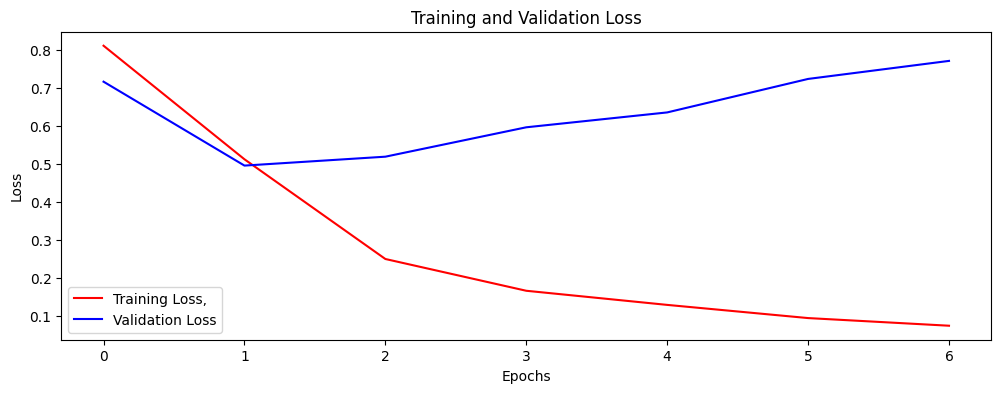

In [ ]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(12, 4))
plt.plot(train_loss, label='Training Loss,', color = 'red')
plt.plot(val_loss, label='Validation Loss', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

Training and Validation Loss
The plot above shows that the training loss decreases steadily, indicating that the model is effectively learning and fitting the training data. Additionally, the decrease in validation loss suggests that the model generalizes well on unseen data.


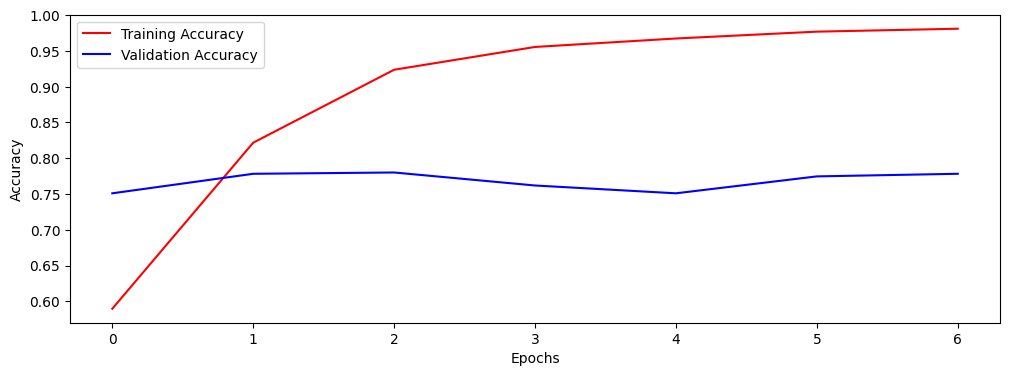

In [ ]:
#plot accuracy
plt.figure(figsize=(12, 4))
plt.plot(train_acc, label='Training Accuracy', color = 'red')
plt.plot(val_acc, label='Validation Accuracy', color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
#perform model prediction
predictions = model.predict(padded_test)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step


In [ ]:
i = 9
print("Review:", X_test[i], "\n")
print("Predicted:", "Fake" if predictions[i][0] >= 0.5 else "genuine", "reviews")
print("Actual:", "Fake" if test_labels[i] == 0 else "genuine", "reviews")

Review: really impressive place hasnt closed 

Predicted: Fake reviews
Actual: Fake reviews


In [ ]:
#Part IV: Model Evaluation

In [ ]:
#E.Provide the code you used to save the trained network within the neural network.
model.save('my_model.keras')



In [ ]:
from google.colab import files
files.download('my_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>